In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
# Load Data
dataset = pd.read_csv('C:\\Users\\RenanSardinha\\Documents\\Data Science\\EstimatedObesityLevels\\Data\\ObesityDataSet_raw_and_data_sinthetic.csv')
dataset

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [4]:
dataset.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
dataset.rename(columns={'family_history_with_overweight':'Overweight_History'}, inplace=True)
dataset.rename(columns={'FAVC':'Hypercaloric_Foods_Consumption'}, inplace=True)
dataset.rename(columns={'FCVC':'Vegetable_Consumption'}, inplace=True)
dataset.rename(columns={'NCP':'Main_Meals_Number'}, inplace=True)
dataset.rename(columns={'CAEC':'Foods_between_Main_Meals'}, inplace=True)
dataset.rename(columns={'SMOKE':'Smoke'}, inplace=True)
dataset.rename(columns={'CH2O':'Drink_Water'}, inplace=True)
dataset.rename(columns={'SCC':'Calorie_Monitoring'}, inplace=True)
dataset.rename(columns={'FAF':'Physical_Activity'}, inplace=True)
dataset.rename(columns={'TUE':'Time_Spent_on_Technologies'}, inplace=True)
dataset.rename(columns={'CALC':'Alcoholic_Drinks'}, inplace=True)
dataset.rename(columns={'MTRANS':'Type_of_Transport_Used'}, inplace=True)
dataset.rename(columns={'NObeyesdad':'Body_Mass_Index'}, inplace=True)

In [5]:
dataset

Gender        Age    Height      Weight Overweight_History  \
0     Female  21.000000  1.620000   64.000000                yes   
1     Female  21.000000  1.520000   56.000000                yes   
2       Male  23.000000  1.800000   77.000000                yes   
3       Male  27.000000  1.800000   87.000000                 no   
4       Male  22.000000  1.780000   89.800000                 no   
...      ...        ...       ...         ...                ...   
2106  Female  20.976842  1.710730  131.408528                yes   
2107  Female  21.982942  1.748584  133.742943                yes   
2108  Female  22.524036  1.752206  133.689352                yes   
2109  Female  24.361936  1.739450  133.346641                yes   
2110  Female  23.664709  1.738836  133.472641                yes   

     Hypercaloric_Foods_Consumption  Vegetable_Consumption  Main_Meals_Number  \
0                                no                    2.0                3.0   
1                                no                    3.0                3.0   
2                                no                    2.0                3.0   
3                                no                    3.0                3.0   
4                                no                    2.0                1.0   
...                             ...                    ...                ...   
2106                            yes                    3.0                3.0   
2107                            yes                    3.0                3.0   
2108                            yes                    3.0                3.0   
2109                            yes                    3.0                3.0   
2110                            yes                    3.0                3.0   

     Foods_between_Main_Meals Smoke  Drink_Water Calorie_Monitoring  \
0                   Sometimes    no     2.000000                 no   
1                   Sometimes   yes     3.000000                yes   
2                   Sometimes    no     2.000000                 no   
3                   Sometimes    no     2.000000                 no   
4                   Sometimes    no     2.000000                 no   
...                       ...   ...          ...                ...   
2106                Sometimes    no     1.728139                 no   
2107                Sometimes    no     2.005130                 no   
2108                Sometimes    no     2.054193                 no   
2109                Sometimes    no     2.852339                 no   
2110                Sometimes    no     2.863513                 no   

      Physical_Activity  Time_Spent_on_Technologies Alcoholic_Drinks  \
0              0.000000                    1.000000               no   
1              3.000000                    0.000000        Sometimes   
2              2.000000                    1.000000       Frequently   
3              2.000000                    0.000000       Frequently   
4              0.000000                    0.000000        Sometimes   
...                 ...                         ...              ...   
2106           1.676269                    0.906247        Sometimes   
2107           1.341390                    0.599270        Sometimes   
2108           1.414209                    0.646288        Sometimes   
2109           1.139107                    0.586035        Sometimes   
2110           1.026452                    0.714137        Sometimes   

     Type_of_Transport_Used      Body_Mass_Index  
0     Public_Transportation        Normal_Weight  
1     Public_Transportation        Normal_Weight  
2     Public_Transportation        Normal_Weight  
3                   Walking   Overweight_Level_I  
4     Public_Transportation  Overweight_Level_II  
...                     ...                  ...  
2106  Public_Transportation     Obesity_Type_III  
2107  Public_Transportation     Obesity_Type_III  
2108  Public_Transportation     Obesity

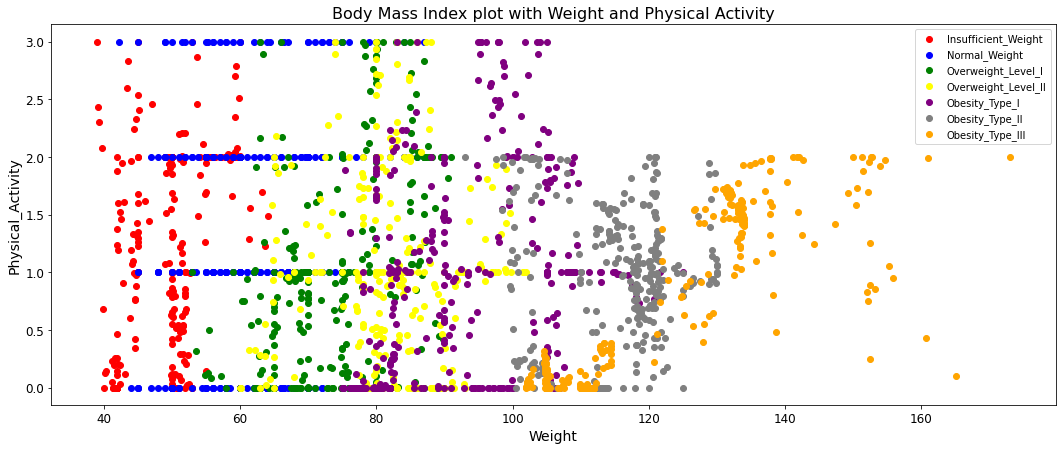

In [6]:
# EDA
## Data Processing
"""
Plot Weight vs Physical_Activity 
Insufficient_Weight - 'red'; Normal_Weight - 'blue'; Overweight_Level_I - 'green'; 
Overweight_Level_II - 'yellow'; Obesity_Type_I - 'purple'; Obesity_Type_II - 'grey'; Obesity_Type_III - 'orange' 
"""

labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'grey', 'orange']

filter = lambda type: dataset['Body_Mass_Index'] == type

plt.figure(figsize=(18,7)) 

for n in range(len(labels)):
    plt.scatter(dataset['Weight'][filter(labels[n])], dataset['Physical_Activity'][filter(labels[n])], color = colors[n], label = labels[n])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('Physical_Activity', fontsize=14)
plt.title('Body Mass Index plot with Weight and Physical Activity', fontsize=16)
plt.legend()

In [7]:
# Applying Ordinal Encoder 
encoder = ce.OrdinalEncoder(mapping = [{'col':'Gender','mapping':{'Male':1,'Female':2}},
                            {'col':'Overweight_History','mapping':{'no':1,'yes':2}},
                            {'col':'Hypercaloric_Foods_Consumption','mapping':{'no':1,'yes':2}},
                            {'col':'Foods_between_Main_Meals','mapping':{'no':1,'Sometimes':2,'Frequently':3,'Always':4}},
                            {'col':'Smoke','mapping':{'no':1,'yes':2}},
                            {'col':'Calorie_Monitoring','mapping':{'no':1,'yes':2}},
                            {'col':'Alcoholic_Drinks','mapping':{'no':1,'Sometimes':2,'Frequently':3,'Always':4}},
                            {'col':'Type_of_Transport_Used','mapping':{'Bike':1,'Walking':2,'Public_Transportation':3,'Motorbike':4,'Automobile':5}},
                            {'col':'Body_Mass_Index','mapping':{'Insufficient_Weight':1,'Normal_Weight':2,'Overweight_Level_I':3,'Overweight_Level_II':4,'Obesity_Type_I':5,'Obesity_Type_II':6,'Obesity_Type_III':7}}])

encoder.fit(dataset)
encoder.transform(dataset)
data_encoder = encoder.fit_transform(dataset)
data_encoder

c:\Users\RenanSardinha\Documents\Data Science\EstimatedObesityLevels\venv\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Gender        Age    Height      Weight  Overweight_History  \
0          2  21.000000  1.620000   64.000000                   2   
1          2  21.000000  1.520000   56.000000                   2   
2          1  23.000000  1.800000   77.000000                   2   
3          1  27.000000  1.800000   87.000000                   1   
4          1  22.000000  1.780000   89.800000                   1   
...      ...        ...       ...         ...                 ...   
2106       2  20.976842  1.710730  131.408528                   2   
2107       2  21.982942  1.748584  133.742943                   2   
2108       2  22.524036  1.752206  133.689352                   2   
2109       2  24.361936  1.739450  133.346641                   2   
2110       2  23.664709  1.738836  133.472641                   2   

      Hypercaloric_Foods_Consumption  Vegetable_Consumption  \
0                                  1                    2.0   
1                                  1                    3.0   
2                                  1                    2.0   
3                                  1                    3.0   
4                                  1                    2.0   
...                              ...                    ...   
2106                               2                    3.0   
2107                               2                    3.0   
2108                               2                    3.0   
2109                               2                    3.0   
2110                               2                    3.0   

      Main_Meals_Number  Foods_between_Main_Meals  Smoke  Drink_Water  \
0                   3.0                         2      1     2.000000   
1                   3.0                         2      2     3.000000   
2                   3.0                         2      1     2.000000   
3                   3.0                         2      1     2.000000   
4                   1.0                         2      1     2.000000   
...                 ...                       ...    ...          ...   
2106                3.0                         2      1     1.728139   
2107                3.0                         2      1     2.005130   
2108                3.0                         2      1     2.054193   
2109                3.0                         2      1     2.852339   
2110                3.0                         2      1     2.863513   

      Calorie_Monitoring  Physical_Activity  Time_Spent_on_Technologies  \
0                      1           0.000000                    1.000000   
1                      2           3.000000                    0.000000   
2                      1           2.000000                    1.000000   
3                      1           2.000000                    0.000000   
4                      1           0.000000                    0.000000   
...                  ...                ...                         ...   
2106                   1           1.676269                    0.906247   
2107                   1           1.341390                    0.599270   
2108                   1           1.414209                    0.646288   
2109                   1           1.139107                    0.586035   
2110                   1           1.026452                    0.714137   

      Alcoholic_Drinks  Type_of_Transport_Used  Body_Mass_Index  
0                    1                       3                2  
1                    2                       3                2  
2                    3                       3                2  
3                    3                       2                3  
4                    2                       3                4  
...                ...                     ...              ...  
2106                 2                       3                7  
2107                 2                       3                7  
2108                 2                       3  

In [9]:
"""
Dictionary: 
Gender = {'Male': 1}, {'Female': 2}
Overweight_History = {'no': 1}, {'yes': 2}
Hypercaloric_Foods_Consumption = {'no': 1}, {'yes': 2}
Foods_between_Main_Meals = {'no': 1}, {'Sometimes': 2}, {'Frequently': 3}, {'Always': 4}
Smoke = {'no': 1}, {'yes': 2}
Calorie_Monitoring = {'no': 1}, {'yes': 2}
Alcoholic_Drinks = {'no': 1}, {'Sometimes': 2}, {'Frequently': 3}, {'Always': 4}
Type_of_Transport_Used = {'Bike': 1}, {'Walking': 2}, {'Public_Transportation': 3}, {'Motorbike': 4}, {'Automobile': 5}
Body_Mass_Index = {'Insufficient_Weight': 1}, {'Normal_Weight': 2}, {'Overweight_Level_I': 3}, {'Overweight_Level_II': 4}, {'Obesity_Type_I': 5}, {'Obesity_Type_II': 6}, {'Obesity_Type_III':7}
"""

"\nDictionary: \nGender = {'Male': 1}, {'Female': 2}\nOverweight_History = {'no': 1}, {'yes': 2}\nHypercaloric_Foods_Consumption = {'no': 1}, {'yes': 2}\nFoods_between_Main_Meals = {'no': 1}, {'Sometimes': 2}, {'Frequently': 3}, {'Always': 4}\nSmoke = {'no': 1}, {'yes': 2}\nCalorie_Monitoring = {'no': 1}, {'yes': 2}\nAlcoholic_Drinks = {'no': 1}, {'Sometimes': 2}, {'Frequently': 3}, {'Always': 4}\nType_of_Transport_Used = {'Bike': 1}, {'Walking': 2}, {'Public_Transportation': 3}, {'Motorbike': 4}, {'Automobile': 5}\nBody_Mass_Index = {'Insufficient_Weight': 1}, {'Normal_Weight': 2}, {'Overweight_Level_I': 3}, {'Overweight_Level_II': 4}, {'Obesity_Type_I': 5}, {'Obesity_Type_II': 6}, {'Obesity_Type_III':7}\n"

In [8]:
data_encoder['Age'] = data_encoder['Age'].apply(lambda age : round(age)) 
data_encoder['Height'] = data_encoder['Height'].apply(lambda height : round(height, 1)) 
data_encoder['Weight'] = data_encoder['Weight'].apply(lambda weight : round(weight)) 
data_encoder['Vegetable_Consumption'] = data_encoder['Vegetable_Consumption'].apply(lambda vegetable_consumption : round(vegetable_consumption)) 
data_encoder['Main_Meals_Number'] = data_encoder['Main_Meals_Number'].apply(lambda main_meals_number : round(main_meals_number)) 
data_encoder['Drink_Water'] = data_encoder['Drink_Water'].apply(lambda drink_water : round(drink_water)) 
data_encoder['Physical_Activity'] = data_encoder['Physical_Activity'].apply(lambda physical_activity : round(physical_activity)) 
data_encoder['Time_Spent_on_Technologies'] = data_encoder['Time_Spent_on_Technologies'].apply(lambda time_spent_on_technologies : round(time_spent_on_technologies))

In [9]:
data_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   int64  
 4   Overweight_History              2111 non-null   int32  
 5   Hypercaloric_Foods_Consumption  2111 non-null   int32  
 6   Vegetable_Consumption           2111 non-null   int64  
 7   Main_Meals_Number               2111 non-null   int64  
 8   Foods_between_Main_Meals        2111 non-null   int32  
 9   Smoke                           2111 non-null   int32  
 10  Drink_Water                     2111 non-null   int64  
 11  Calorie_Monitoring              2111 non-null   int32  
 12  Physical_Activity               21

c:\Users\RenanSardinha\Documents\Data Science\EstimatedObesityLevels\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


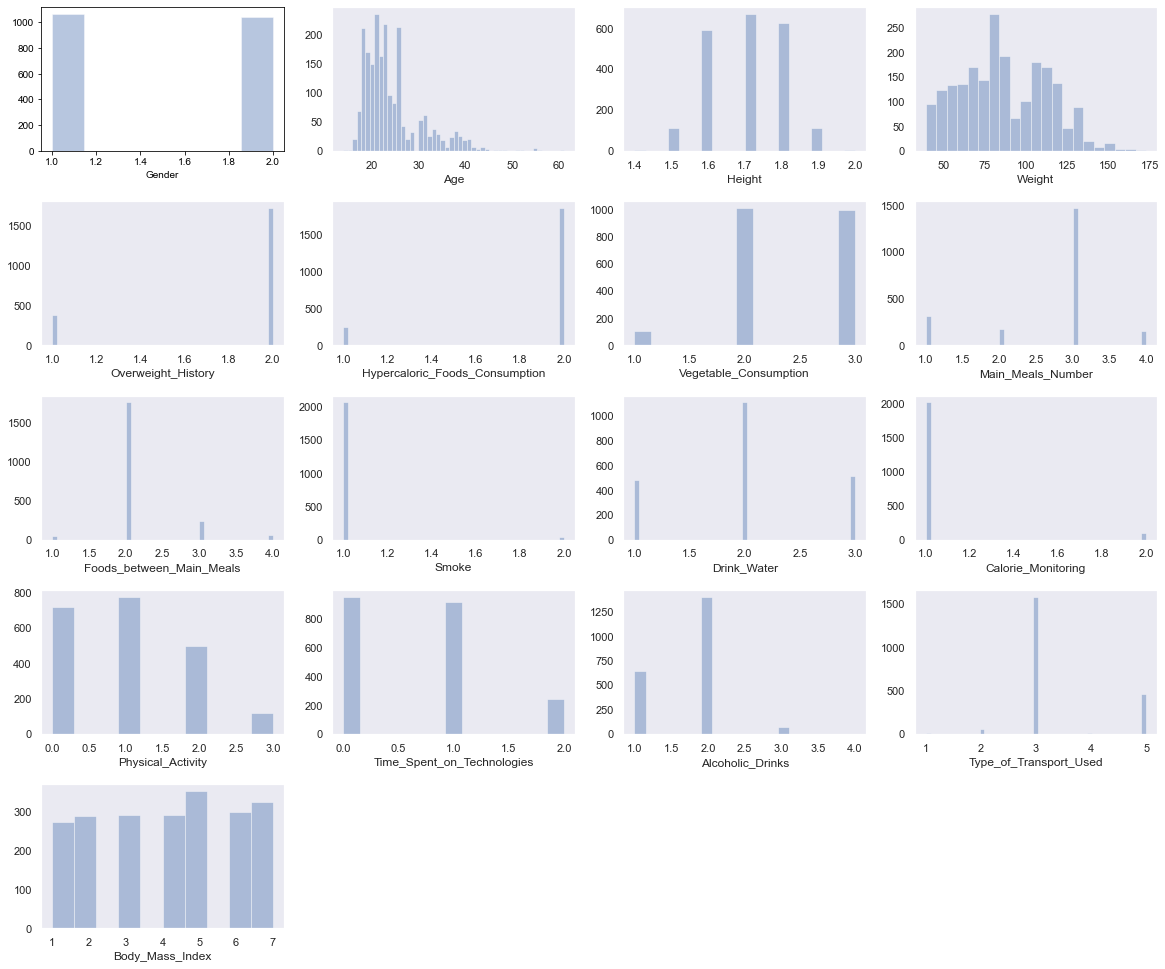

In [10]:
## Descriptive Analysis
plt.figure(figsize=(20,16)) 

for i,col in enumerate(list(data_encoder.columns.values)):
    plt.subplot(5,4,i+1)
    sns.set(style='dark')
    sns.distplot(data_encoder[col], color='b', kde= 0, label='data_encoder')
    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.2, 
                        hspace=0.35)

In [11]:
data_encoder.describe()

Gender          Age       Height       Weight  Overweight_History  \
count  2111.000000  2111.000000  2111.000000  2111.000000         2111.000000   
mean      1.494079    24.315964     1.701847    86.586452            1.817622   
std       0.500083     6.357078     0.100385    26.190136            0.386247   
min       1.000000    14.000000     1.400000    39.000000            1.000000   
25%       1.000000    20.000000     1.600000    65.500000            2.000000   
50%       1.000000    23.000000     1.700000    83.000000            2.000000   
75%       2.000000    26.000000     1.800000   107.000000            2.000000   
max       2.000000    61.000000     2.000000   173.000000            2.000000   

       Hypercaloric_Foods_Consumption  Vegetable_Consumption  \
count                     2111.000000            2111.000000   
mean                         1.883941               2.423496   
std                          0.320371               0.583905   
min                          1.000000               1.000000   
25%                          2.000000               2.000000   
50%                          2.000000               2.000000   
75%                          2.000000               3.000000   
max                          2.000000               3.000000   

       Main_Meals_Number  Foods_between_Main_Meals        Smoke  Drink_Water  \
count        2111.000000               2111.000000  2111.000000  2111.000000   
mean            2.687826                  2.140692     1.020843     2.014685   
std             0.809680                  0.468543     0.142893     0.688616   
min             1.000000                  1.000000     1.000000     1.000000   
25%             3.000000                  2.000000     1.000000     2.000000   
50%             3.000000                  2.000000     1.000000     2.000000   
75%             3.000000                  2.000000     1.000000     2.000000   
max             4.000000                  4.000000     2.000000     3.000000   

       Calorie_Monitoring  Physical_Activity  Time_Spent_on_Technologies  \
count         2111.000000        2111.000000                 2111.000000   
mean             1.045476           1.006632                    0.664614   
std              0.208395           0.895462                    0.674009   
min              1.000000           0.000000                    0.000000   
25%              1.000000           0.000000                    0.000000   
50%              1.000000           1.000000                    1.000000   
75%              1.000000           2.000000                    1.000000   
max              2.000000           3.000000                    2.000000   

       Alcoholic_Drinks  Type_of_Transport_Used  Body_Mass_Index  
count       2111.000000             2111.000000      2111.000000  
mean           1.731407                3.405021         4.112269  
std            0.515498                0.864439         1.985062  
min            1.000000                1.000000         1.000000  
25%            1.000000                3.000000         2.000000  
50%            2.000000                3.000000         4.000000  
75%            2.000000                3.000000         6.000000  
max            4.000000                5.000000         7.000000

In [12]:
data_encoder.mode()

Gender  Age  Height  Weight  Overweight_History  \
0       1   21     1.7      80                   2   

   Hypercaloric_Foods_Consumption  Vegetable_Consumption  Main_Meals_Number  \
0                               2                      2                  3   

   Foods_between_Main_Meals  Smoke  Drink_Water  Calorie_Monitoring  \
0                         2      1            2                   1   

   Physical_Activity  Time_Spent_on_Technologies  Alcoholic_Drinks  \
0                  1                           0                 2   

   Type_of_Transport_Used  Body_Mass_Index  
0                       3                5

In [13]:
data_encoder.var()

Gender                              0.250083
Age                                40.412442
Height                              0.010077
Weight                            685.923210
Overweight_History                  0.149187
Hypercaloric_Foods_Consumption      0.102638
Vegetable_Consumption               0.340945
Main_Meals_Number                   0.655582
Foods_between_Main_Meals            0.219533
Smoke                               0.020418
Drink_Water                         0.474192
Calorie_Monitoring                  0.043429
Physical_Activity                   0.801852
Time_Spent_on_Technologies          0.454288
Alcoholic_Drinks                    0.265738
Type_of_Transport_Used              0.747254
Body_Mass_Index                     3.940470
dtype: float64

<AxesSubplot:xlabel='Body_Mass_Index', ylabel='count'>

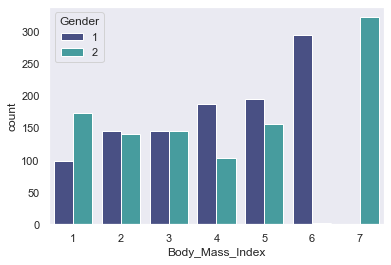

In [14]:
"""
Dictionary: 
Gender = {'Male': 1}, {'Female': 2}
"""
sns.countplot(x='Body_Mass_Index', hue='Gender', data=data_encoder, palette='mako')

<AxesSubplot:xlabel='Body_Mass_Index', ylabel='count'>

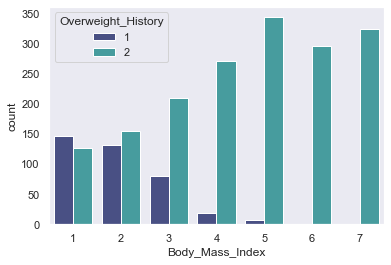

In [15]:
"""
Dictionary: 
Overweight_History = {'no': 1}, {'yes': 2}
"""
sns.countplot(x='Body_Mass_Index', hue='Overweight_History', data=data_encoder, palette='mako')

<AxesSubplot:xlabel='Body_Mass_Index', ylabel='count'>

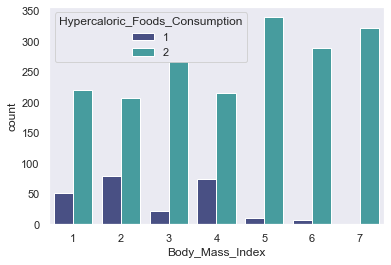

In [16]:
"""
Dictionary: 
Hypercaloric_Foods_Consumption = {'no': 1}, {'yes': 2}
"""
sns.countplot(x='Body_Mass_Index', hue='Hypercaloric_Foods_Consumption', data=data_encoder, palette='mako')

<AxesSubplot:xlabel='Body_Mass_Index', ylabel='count'>

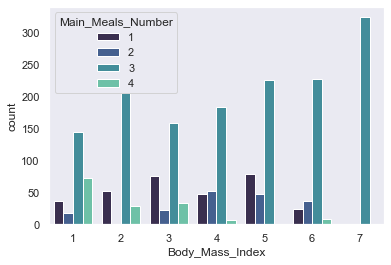

In [17]:
sns.countplot(x='Body_Mass_Index', hue='Main_Meals_Number', data=data_encoder, palette='mako')

<AxesSubplot:xlabel='Body_Mass_Index', ylabel='count'>

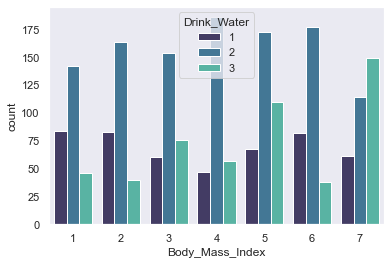

In [18]:
sns.countplot(x='Body_Mass_Index', hue='Drink_Water', data=data_encoder, palette='mako')

<AxesSubplot:xlabel='Body_Mass_Index', ylabel='count'>

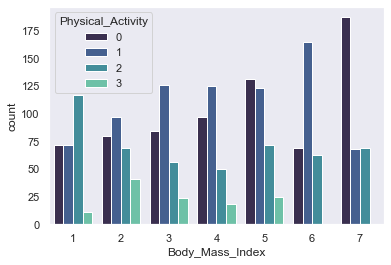

In [19]:
sns.countplot(x='Body_Mass_Index', hue='Physical_Activity', data=data_encoder, palette='mako')

<AxesSubplot:xlabel='Body_Mass_Index', ylabel='count'>

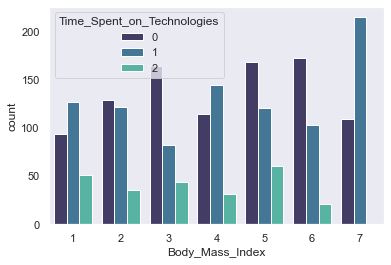

In [20]:
sns.countplot(x='Body_Mass_Index', hue='Time_Spent_on_Technologies', data=data_encoder, palette='mako')

<AxesSubplot:xlabel='Body_Mass_Index', ylabel='count'>

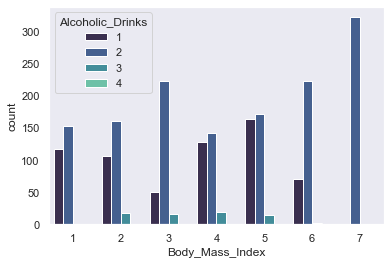

In [21]:
"""
Dictionary: 
Alcoholic_Drinks = {'no': 1}, {'Sometimes': 2}, {'Frequently': 3}, {'Always': 4}
"""
sns.countplot(x='Body_Mass_Index', hue='Alcoholic_Drinks', data=data_encoder, palette='mako')

<AxesSubplot:xlabel='Body_Mass_Index', ylabel='count'>

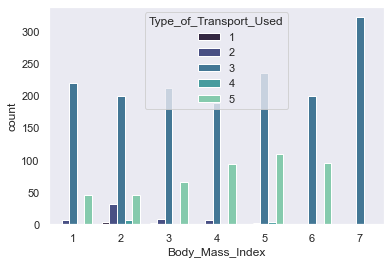

In [22]:
"""
Dictionary: 
Type_of_Transport_Used = {'Bike': 1}, {'Walking': 2}, {'Public_Transportation': 3}, {'Motorbike': 4}, {'Automobile': 5}
"""
sns.countplot(x='Body_Mass_Index', hue='Type_of_Transport_Used', data=data_encoder, palette='mako')

Text(0.5, 1.0, 'Correlation Heatmap')

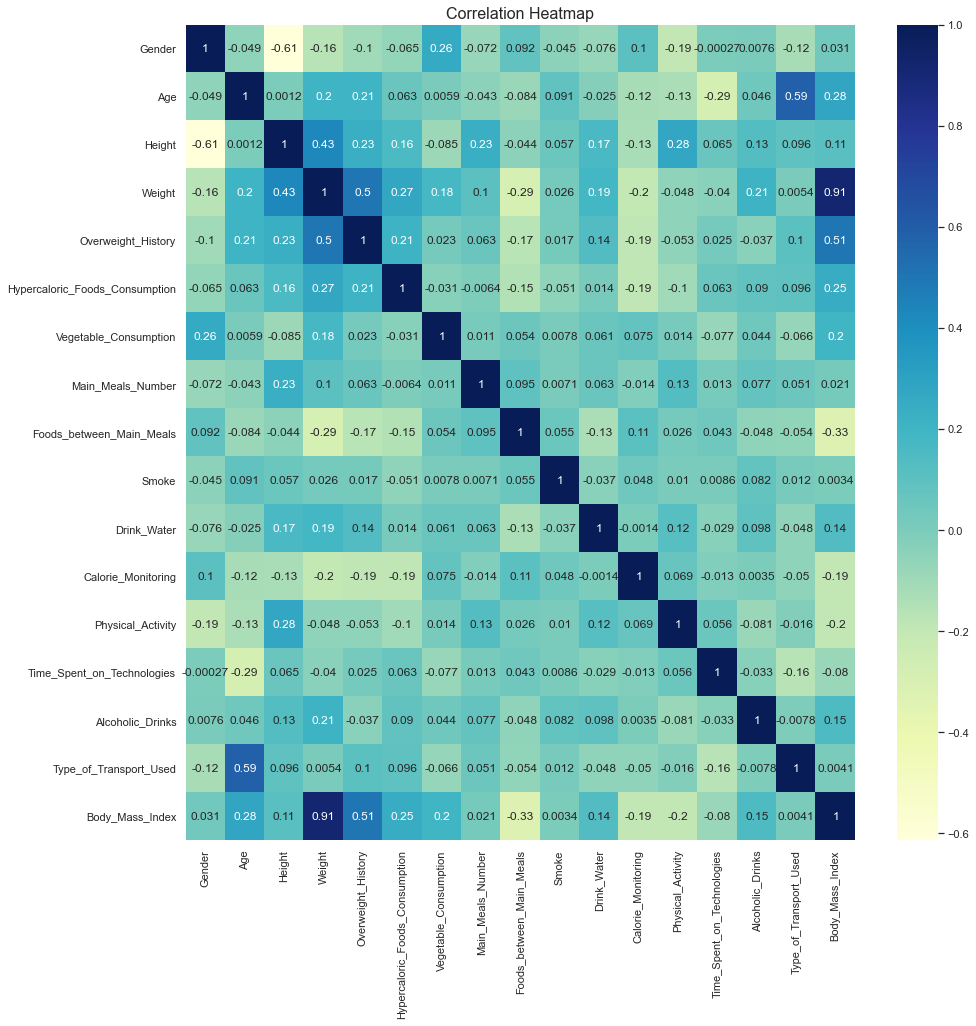

In [23]:
## Relationships Between Variables
plt.figure(figsize=(15,15))
sns.heatmap(data_encoder.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap',fontsize=16)

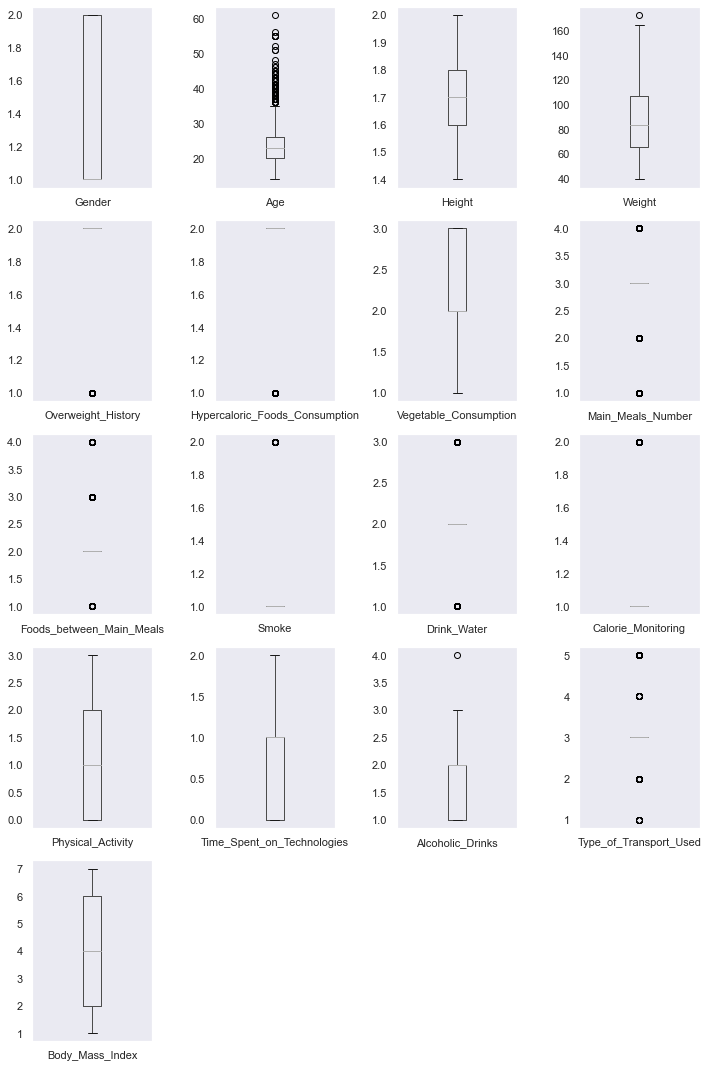

In [24]:
## Outliers Detection

plt.figure(figsize=(10,15))

for i, col in enumerate(list(data_encoder.columns.values)):
    plt.subplot(5,4,i+1)
    data_encoder.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [26]:
data_encoder['Age'].value_counts()

21    236
23    218
26    213
18    212
19    169
22    163
20    150
24     95
25     82
17     69
31     62
30     53
27     43
33     37
38     34
29     33
34     29
32     26
39     25
37     24
41     20
16     20
28     20
40     19
35     19
42      6
44      6
36      6
55      5
43      3
45      3
51      2
46      2
47      1
14      1
15      1
56      1
52      1
48      1
61      1
Name: Age, dtype: int64

In [27]:
data_encoder['Weight'].value_counts()

80     92
105    80
50     75
112    64
75     57
       ..
156     1
154     1
140     1
165     1
173     1
Name: Weight, Length: 118, dtype: int64

In [28]:
# Regression
# Creating the Linear Regression Model with "Weight" and "Body Mass Index" columns.

X = data_encoder['Weight'].values.reshape(-1,1)
y = data_encoder['Body_Mass_Index'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [29]:
print("The model is: Body Mass Index = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The model is: Body Mass Index = -1.8815 + 0.069223X


In [30]:
pred = reg.predict(X)

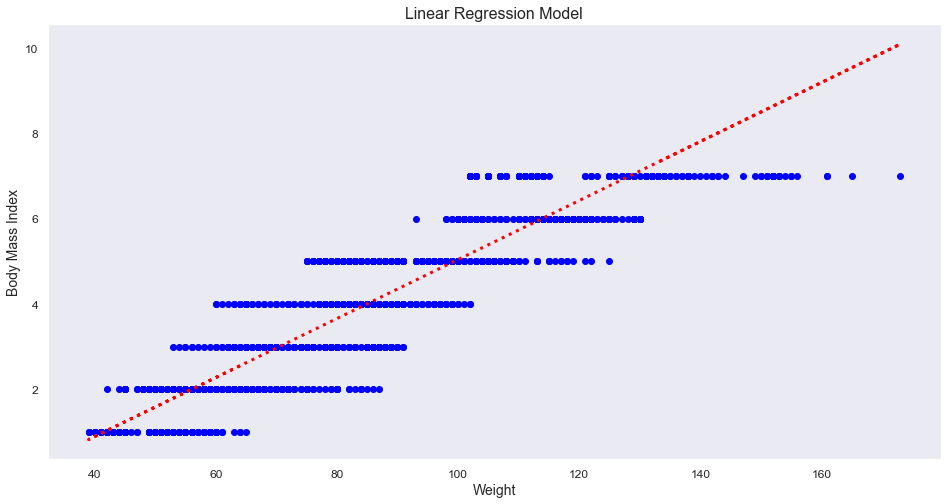

In [31]:
plt.figure(figsize = (16,8))
plt.scatter(
    data_encoder['Weight'],
    data_encoder['Body_Mass_Index'],
    c = 'blue')

plt.plot(
    data_encoder['Weight'],
    pred,
    c = 'red',
    linewidth = 3,
    linestyle = ':')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('Body Mass Index', fontsize=14)
plt.title('Linear Regression Model', fontsize=16)
plt.show()


In [32]:
Xols = data_encoder['Weight']
yols = data_encoder['Body_Mass_Index']
X2 = sm.add_constant(Xols)
est = sm.OLS(yols,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Body_Mass_Index   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 1.060e+04
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        22:02:22   Log-Likelihood:                -2546.1
No. Observations:                2111   AIC:                             5096.
Df Residuals:                    2109   BIC:                             5108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8815      0.061    -30.942      0.0

In [33]:
# Training the model with the data set
Xlr = data_encoder.drop(['Body_Mass_Index'], axis = 1)
ylr = data_encoder['Body_Mass_Index']

In [34]:
# Separating training and test data
X_train, X_test, y_train, y_test = train_test_split(Xlr,ylr,test_size = .3, random_state=1)

In [35]:
# Model Training
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [38]:
# Performance Metrics
mae_test = mean_absolute_error(y_test, pred_test)
mape_test = mean_absolute_percentage_error(y_test, pred_test)
print('MAE_test: {:0.2f}'.format(mae_test))
print('MAPE_test: {:0.2f}'.format(mape_test))

MAE_test: 0.38
MAPE_test: 0.14


In [39]:
# Cross Validation
result_cv = cross_val_score(lr, X_test, y_test, cv = 10)
print('Cross Validation: {}'.format(result_cv))
print("%0.2f accuracy with a standard deviation of %0.2f" % (result_cv.mean(), result_cv.std()))

Cross Validation: [0.93720505 0.951772   0.92011071 0.9313185  0.93669104 0.95035293
 0.92906338 0.95732388 0.94004657 0.9233097 ]
0.94 accuracy with a standard deviation of 0.01


In [100]:
# Creating the Linear Regression Model with "Age" and "Body Mass Index" columns.

X = data_encoder['Age'].values.reshape(-1,1)
y = data_encoder['Body_Mass_Index'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [101]:
print("The model is: Body Mass Index = {:.5} + {:.5}X".format(model.intercept_[0], model.coef_[0][0]))

The model is: Body Mass Index = 1.9553 + 0.088708X


In [102]:
predmodel = model.predict(X)

In [104]:
Xols = data_encoder['Age']
yols = data_encoder['Body_Mass_Index']
X3 = sm.add_constant(Xols)
est = sm.OLS(yols,X3)
est3 = est.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:        Body_Mass_Index   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     185.1
Date:                Thu, 06 May 2021   Prob (F-statistic):           1.77e-40
Time:                        11:07:21   Log-Likelihood:                -4353.5
No. Observations:                2111   AIC:                             8711.
Df Residuals:                    2109   BIC:                             8722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9553      0.164     11.933      0.0

In [40]:
# Clustering: K-means
Xc = data_encoder.iloc[:, [12,16]].values

print(Xc)

[[0 2]
 [3 2]
 [2 2]
 ...
 [1 7]
 [1 7]
 [1 7]]


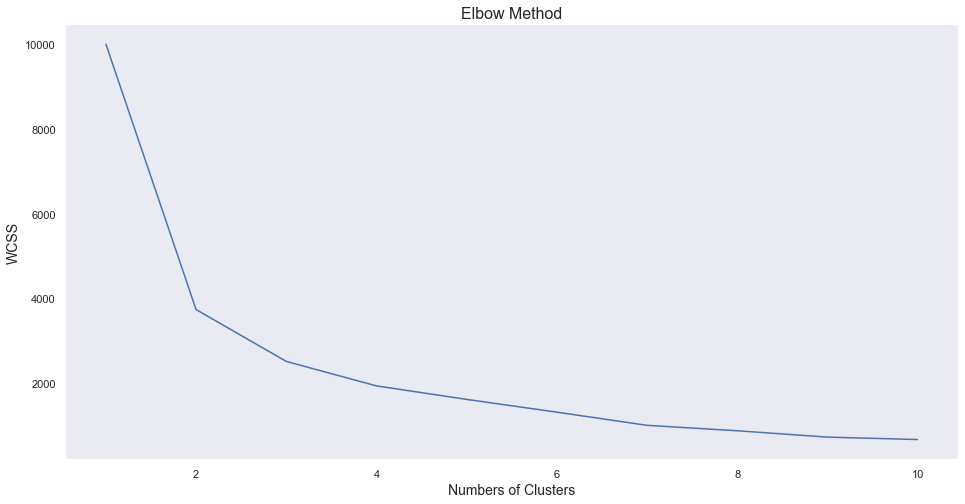

In [42]:
# Elbow Method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(Xc)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (16,8))
plt.plot(range(1,11), wcss)
plt.xlabel('Numbers of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.title('Elbow Method', fontsize=16)
plt.show()

In [43]:
k = 7
kmeans = KMeans(n_clusters = 7, random_state = 0)
pred_k = kmeans.fit_predict(Xc)
print(pred_k)

[2 5 5 ... 1 1 1]


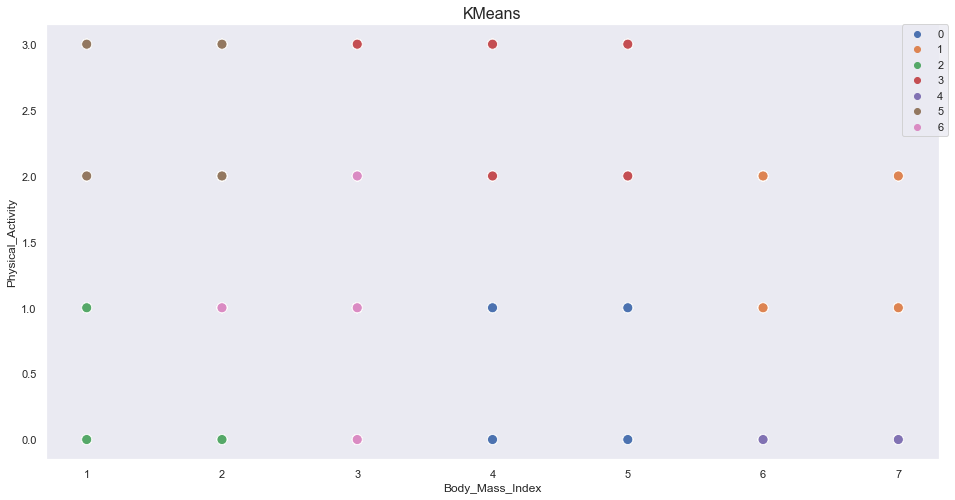

In [46]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = data_encoder, x = 'Body_Mass_Index', y = 'Physical_Activity', hue = pred_k, palette = "deep", s = 100)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("KMeans", fontsize=16)
plt.show()

In [47]:
data_kmeans = dataset.copy()
data_kmeans['Cluster'] = pred_k
print(data_kmeans.head())

   Gender   Age  Height  Weight Overweight_History  \
0  Female  21.0    1.62    64.0                yes   
1  Female  21.0    1.52    56.0                yes   
2    Male  23.0    1.80    77.0                yes   
3    Male  27.0    1.80    87.0                 no   
4    Male  22.0    1.78    89.8                 no   

  Hypercaloric_Foods_Consumption  Vegetable_Consumption  Main_Meals_Number  \
0                             no                    2.0                3.0   
1                             no                    3.0                3.0   
2                             no                    2.0                3.0   
3                             no                    3.0                3.0   
4                             no                    2.0                1.0   

  Foods_between_Main_Meals Smoke  Drink_Water Calorie_Monitoring  \
0                Sometimes    no          2.0                 no   
1                Sometimes   yes          3.0                yes   
2 

In [48]:
boolArray = data_kmeans['Cluster'] == 4
print(data_kmeans[boolArray])

      Gender        Age    Height      Weight Overweight_History  \
68      Male  30.000000  1.760000  112.000000                yes   
197     Male  41.000000  1.750000  118.000000                yes   
202   Female  26.000000  1.560000  102.000000                yes   
210     Male  20.000000  1.800000  114.000000                yes   
229     Male  32.000000  1.750000  120.000000                yes   
...      ...        ...       ...         ...                ...   
2098  Female  25.992348  1.606474  104.954291                yes   
2099  Female  25.974446  1.628855  108.090006                yes   
2100  Female  25.777565  1.628205  107.378702                yes   
2101  Female  25.722004  1.628470  107.218949                yes   
2102  Female  25.765628  1.627839  108.107360                yes   

     Hypercaloric_Foods_Consumption  Vegetable_Consumption  Main_Meals_Number  \
68                              yes                    1.0                3.0   
197                  

In [50]:
# Performance Metrics
kmeans_metrics = silhouette_score(Xc, kmeans.labels_, metric = 'euclidean')
print('The Silhouette_Score of K-means is: {:0.2f}'.format(kmeans_metrics))

The Silhouette_Score of K-means is: 0.50


In [51]:
# Clustering: Agglomerative Hierarchical
Xc = data_encoder.iloc[:, [12,16]].values

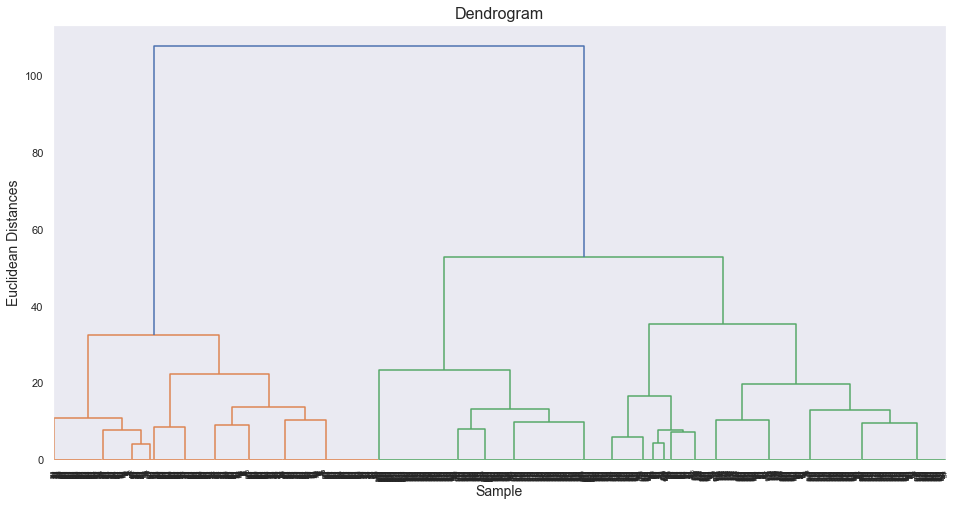

In [65]:
plt.figure(figsize = (16,8))
hc = sch.dendrogram(sch.linkage(Xc, method = 'ward'))
plt.title('Dendrogram', fontsize=16)
plt.xlabel('Sample', fontsize=14)
plt.ylabel('Euclidean Distances', fontsize=14)
plt.show()


In [54]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward' )
pred_h = hc.fit_predict(Xc)

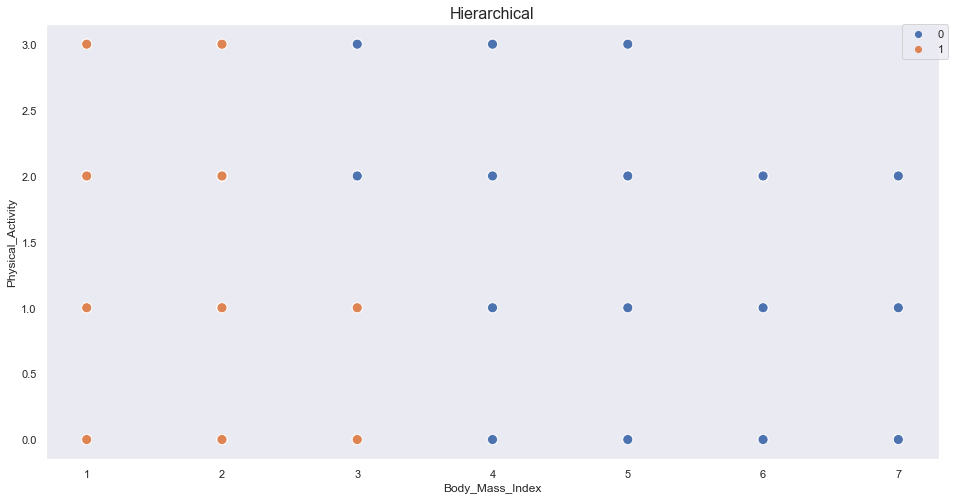

In [56]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = data_encoder, x = 'Body_Mass_Index', y = 'Physical_Activity', hue = pred_h, palette = "deep", s = 100)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Hierarchical", fontsize=16)
plt.show()

In [57]:
data_hc = dataset.copy()
data_hc['Cluster'] = pred_h
print(data_hc.head())

   Gender   Age  Height  Weight Overweight_History  \
0  Female  21.0    1.62    64.0                yes   
1  Female  21.0    1.52    56.0                yes   
2    Male  23.0    1.80    77.0                yes   
3    Male  27.0    1.80    87.0                 no   
4    Male  22.0    1.78    89.8                 no   

  Hypercaloric_Foods_Consumption  Vegetable_Consumption  Main_Meals_Number  \
0                             no                    2.0                3.0   
1                             no                    3.0                3.0   
2                             no                    2.0                3.0   
3                             no                    3.0                3.0   
4                             no                    2.0                1.0   

  Foods_between_Main_Meals Smoke  Drink_Water Calorie_Monitoring  \
0                Sometimes    no          2.0                 no   
1                Sometimes   yes          3.0                yes   
2 

In [58]:
boolArrayhc = data_hc['Cluster'] == 0
print(data_hc[boolArrayhc])

      Gender        Age    Height      Weight Overweight_History  \
3       Male  27.000000  1.800000   87.000000                 no   
4       Male  22.000000  1.780000   89.800000                 no   
10      Male  26.000000  1.850000  105.000000                yes   
11    Female  21.000000  1.720000   80.000000                yes   
13      Male  41.000000  1.800000   99.000000                 no   
...      ...        ...       ...         ...                ...   
2106  Female  20.976842  1.710730  131.408528                yes   
2107  Female  21.982942  1.748584  133.742943                yes   
2108  Female  22.524036  1.752206  133.689352                yes   
2109  Female  24.361936  1.739450  133.346641                yes   
2110  Female  23.664709  1.738836  133.472641                yes   

     Hypercaloric_Foods_Consumption  Vegetable_Consumption  Main_Meals_Number  \
3                                no                    3.0                3.0   
4                    

In [59]:
# Performance Metrics
hc_metrics = silhouette_score(Xc, hc.labels_, metric = 'euclidean')
print('The Silhouette_Score of Hierarchical is: {:0.2f}'.format(hc_metrics))

The Silhouette_Score of Hierarchical is: 0.49


In [66]:
# Clustering: DBSCAN
Xc = data_encoder.iloc[:, [12,16]].values

In [67]:
dbscan = DBSCAN(eps = .5, min_samples = 15)
dbscan.fit(Xc)
pred_d = dbscan.labels_
print(pred_d)

[ 0  1  2 ... 24 24 24]


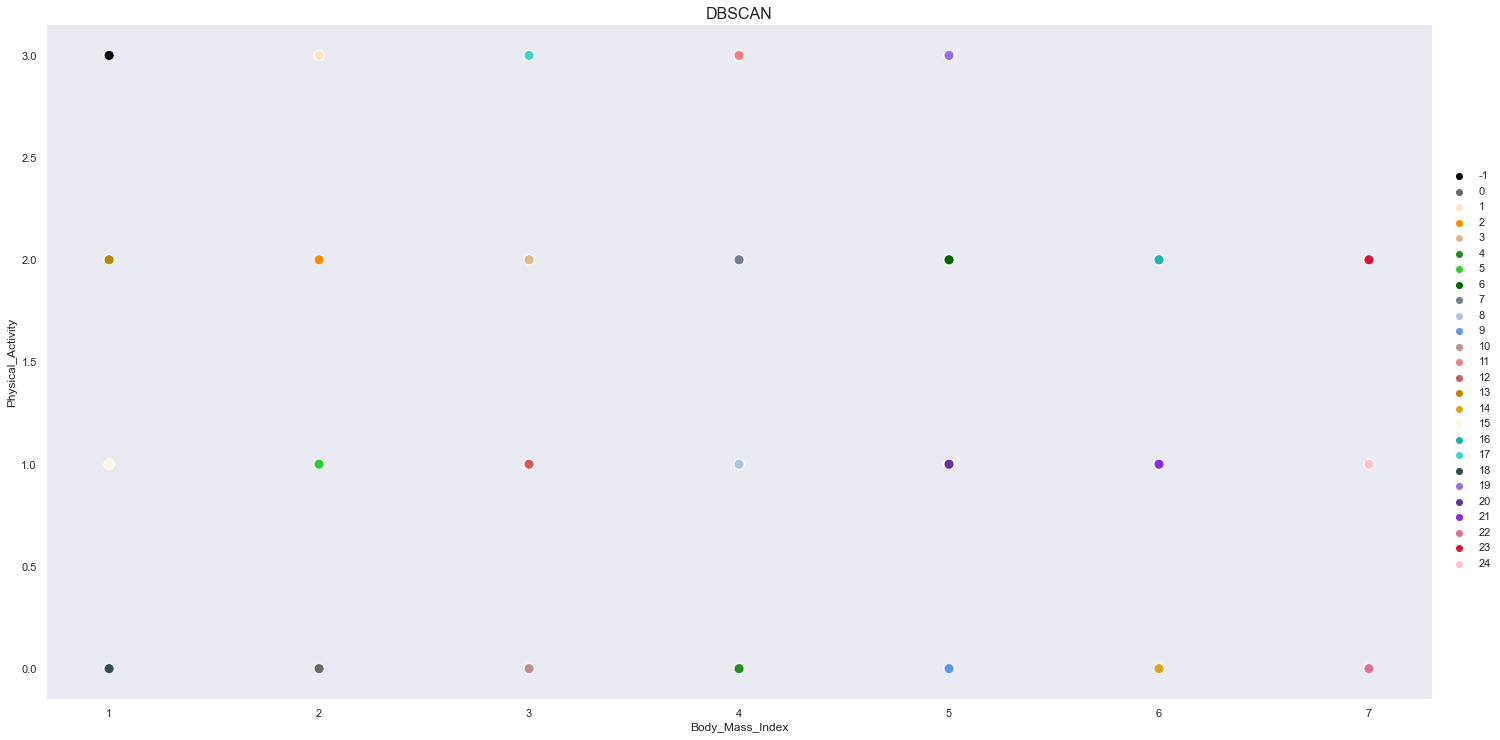

In [99]:
sns.relplot(x = 'Body_Mass_Index', y = 'Physical_Activity', hue = pred_d, data = data_encoder, palette = ["black", "dimgray", "bisque", "darkorange", "burlywood", 
"forestgreen", "limegreen", "darkgreen", "slategrey", "lightsteelblue", "cornflowerblue", "rosybrown", "lightcoral", "indianred", "darkgoldenrod",
"goldenrod", "cornsilk", "lightseagreen", "mediumturquoise", "darkslategray", "mediumpurple", "rebeccapurple", "blueviolet", "palevioletred", "crimson",
"pink"], s = 100, height=10,aspect=2)
plt.title("DBSCAN", fontsize=16)
plt.show()

In [81]:
data_d = dataset.copy()
data_d['Cluster'] = pred_d
print(data_d.head())

   Gender   Age  Height  Weight Overweight_History  \
0  Female  21.0    1.62    64.0                yes   
1  Female  21.0    1.52    56.0                yes   
2    Male  23.0    1.80    77.0                yes   
3    Male  27.0    1.80    87.0                 no   
4    Male  22.0    1.78    89.8                 no   

  Hypercaloric_Foods_Consumption  Vegetable_Consumption  Main_Meals_Number  \
0                             no                    2.0                3.0   
1                             no                    3.0                3.0   
2                             no                    2.0                3.0   
3                             no                    3.0                3.0   
4                             no                    2.0                1.0   

  Foods_between_Main_Meals Smoke  Drink_Water Calorie_Monitoring  \
0                Sometimes    no          2.0                 no   
1                Sometimes   yes          3.0                yes   
2 

In [82]:
boolArraydb = data_d['Cluster'] == 22
print(data_d[boolArraydb])

      Gender        Age    Height      Weight Overweight_History  \
202   Female  26.000000  1.560000  102.000000                yes   
403   Female  26.000000  1.660000  112.000000                yes   
498   Female  25.196214  1.686306  104.572712                yes   
500   Female  26.000000  1.622397  110.792630                yes   
502   Female  21.900120  1.843419  165.057269                yes   
...      ...        ...       ...         ...                ...   
2098  Female  25.992348  1.606474  104.954291                yes   
2099  Female  25.974446  1.628855  108.090006                yes   
2100  Female  25.777565  1.628205  107.378702                yes   
2101  Female  25.722004  1.628470  107.218949                yes   
2102  Female  25.765628  1.627839  108.107360                yes   

     Hypercaloric_Foods_Consumption  Vegetable_Consumption  Main_Meals_Number  \
202                             yes                    3.0                3.0   
403                  

In [83]:
# Performance Metrics
dbscan_metrics = silhouette_score(Xc, dbscan.labels_, metric = 'euclidean')
print('The Silhouette_Score of DBSCAN is: {:0.2f}'.format(dbscan_metrics))

The Silhouette_Score of DBSCAN is: 1.00


In [84]:
# Classification
# Training the model with the data set
Xlor = data_encoder.drop(['Body_Mass_Index'], axis = 1)
ylor = data_encoder['Body_Mass_Index']

In [85]:
# Separating training and test data
X_train, X_test, y_train, y_test = train_test_split(Xlor,ylor,test_size = .3,random_state=1)

In [86]:
# Logistic Regression Classifier
lor = LogisticRegression()
lor.fit(X_train,y_train)

c:\Users\RenanSardinha\Documents\Data Science\EstimatedObesityLevels\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
pred_train_lor = lor.predict(X_train)
pred_test_lor = lor.predict(X_test)

In [88]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(lor.score(X_test,y_test)))
print('Accuracy of Logistic Regression Classifier on train set: {:.2f}'.format(lor.score(X_train,y_train)))

Accuracy of Logistic Regression Classifier on test set: 0.70
Accuracy of Logistic Regression Classifier on train set: 0.71


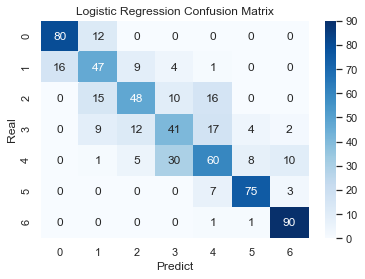

In [89]:
# Confusion Matrix
cmlr = confusion_matrix(y_test, pred_test_lor)
sns.heatmap(cmlr,annot=True,fmt='g',cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

In [90]:
# Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

In [92]:
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(tree.score(X_test,y_test)))
print('Accuracy of Decision Tree Classifier on train set: {:.2f}'.format(tree.score(X_train,y_train)))

Accuracy of Decision Tree Classifier on test set: 0.91
Accuracy of Decision Tree Classifier on train set: 1.00


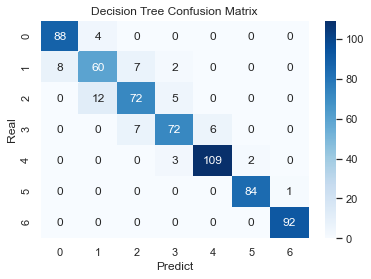

In [93]:
# Confusion Matrix
cmdt = confusion_matrix(y_test, pred_test_tree)
sns.heatmap(cmdt,annot=True,fmt='g',cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

In [94]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [95]:
pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

In [96]:
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(rf.score(X_test,y_test)))
print('Accuracy of Random Forest Classifier on train set: {:.2f}'.format(rf.score(X_train,y_train)))

Accuracy of Random Forest Classifier on test set: 0.93
Accuracy of Random Forest Classifier on train set: 1.00


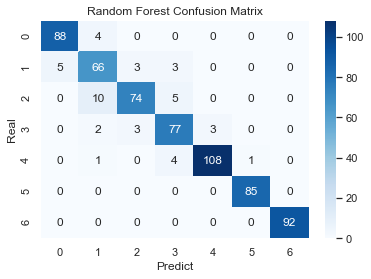

In [97]:
# Confusion Matrix
cmrf = confusion_matrix(y_test, pred_test_rf)
sns.heatmap(cmrf,annot=True,fmt='g',cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()